In [46]:
#Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import drive
import os, shutil
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

# Montamos nuestro Google Drive
drive.mount('/content/drive')


#Global variable definition
data_path = '/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/data'
input_shape = (96,96,3)
x_train = list()
colour_labels = ['black','blue','red']
y_colour = list()
type_labels = ['jeans','shoes','dress','shirt']
y_type = list()

#Importamos las imágenes y las guardamos en las variables

src_files = os.listdir(data_path)
for file_name in src_files:
  src_img = os.listdir(data_path + '/' + file_name)
  for img_name in src_img:
    full_img_name = (data_path + '/' + file_name + '/' + img_name)
    image = load_img(full_img_name, target_size=input_shape)
    image = np.resize(image, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image) 
    x_train.append(image)
    for idx,colour in enumerate(colour_labels):
      if colour in file_name:
        y_colour.append(idx)
    for idx,tipo in enumerate(type_labels):
      if tipo in file_name:
        y_type.append(idx)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
np.save('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/x_train_sparse',x_train)
np.save('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/y_colour_sparse',y_colour)
np.save('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/y_type_sparse',y_type)

In [142]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras import Model
from keras import optimizers
from keras import Input
import tensorflow as tf
#Guardamos las variables como arrays
x_train = np.array(np.load('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/x_train_sparse.npy'))
x_train = x_train/255.0
y_colour = np.array(np.load('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/y_colour_sparse.npy'))
y_type = np.array(np.load('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/y_type_sparse.npy'))

#Pasamos las labels a formato one-hot-encoding
lb = LabelBinarizer()
y_colour = lb.fit_transform(y_colour)
y_type = lb.fit_transform(y_type)

#Preprocesamos las imágenes
validation_split = 0.2
batch_size = 64
aug_factor = 2
epochs = 50

#Model configuration
inputs = Input(shape=input_shape)

#Colour classification model
y = Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same')(inputs)
y = MaxPooling2D(pool_size = (2,2))(y)
y = Dropout(0.5)(y)
y = Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same')(y)
y = MaxPooling2D(pool_size = (2,2))(y)
y = Dropout(0.5)(y)
y = Flatten()(y)
y = Dense(64,activation = 'relu')(y)
y = Dropout(0.5)(y)
y = Dense(len(colour_labels),activation = 'softmax')(y)
#y = Model(inputs = inputs,outputs = y)
#Type classification model
x = Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)
x = Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)
#x = Dropout(0.5)(x)
#x = Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same')(x)
#x = MaxPooling2D(pool_size = (2,2))(x)
#x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(type_labels),activation = 'softmax')(x)
#x = Model(inputs = inputs,outputs = x)
#Test
model = Model(inputs = inputs,outputs = [x,y])

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

# Entrenamos el modelo
H = model.fit(x_train, y=[y_type,y_colour], epochs=epochs, verbose=1, validation_split=validation_split)

#Guardamos el modelo
model.save('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/Models/model')

Train on 2046 samples, validate on 512 samples
Epoch 1/50
2046/2046 [==============================] - 4s 2ms/step - loss: 2.1119 - dense_92_loss: 1.4800 - dense_90_loss: 0.6319 - dense_92_acc: 0.4497 - dense_90_acc: 0.8113 - val_loss: 1.3247 - val_dense_92_loss: 1.0145 - val_dense_90_loss: 0.3102 - val_dense_92_acc: 0.5723 - val_dense_90_acc: 0.8984
Epoch 2/50
2046/2046 [==============================] - 1s 548us/step - loss: 0.8879 - dense_92_loss: 0.8041 - dense_90_loss: 0.0838 - dense_92_acc: 0.6774 - dense_90_acc: 0.9761 - val_loss: 1.4840 - val_dense_92_loss: 0.9608 - val_dense_90_loss: 0.5232 - val_dense_92_acc: 0.5762 - val_dense_90_acc: 0.7266
Epoch 3/50
2046/2046 [==============================] - 1s 560us/step - loss: 0.6334 - dense_92_loss: 0.5752 - dense_90_loss: 0.0582 - dense_92_acc: 0.7815 - dense_90_acc: 0.9858 - val_loss: 1.2439 - val_dense_92_loss: 0.8519 - val_dense_90_loss: 0.3921 - val_dense_92_acc: 0.6113 - val_dense_90_acc: 0.8555
Epoch 4/50
2046/2046 [=========

[INFO]: Clasificando imagen...
[array([[7.8879535e-02, 5.4287524e-05, 9.1386002e-01, 7.2062369e-03]],
      dtype=float32), array([[0., 0., 1.]], dtype=float32)]
Predicción: dress - Confianza: 91.39% - Ground Truth: _
Predicción: red - Confianza: 100.00% - Ground Truth: _


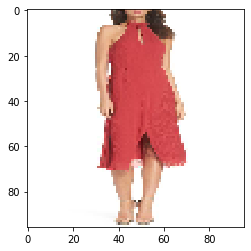

In [159]:
#Hacemos las predicciones

#Cargamos las imágenes de test
x_test = list()
examples_path = '/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/examples'
src_img = os.listdir(examples_path)
for img_name in src_img:
  full_img_name = (examples_path + '/' + img_name)
  image = load_img(full_img_name, target_size=input_shape)
  image = np.resize(image, (input_shape[0], input_shape[1], 3))
  image = img_to_array(image) 
  x_test.append(image)
x_test = np.array(x_test)
x_test = x_test/255.0
def predict_image(image, model, gt_str):
  # Creamos una copia en la variable output sobre la que mostraremos el resultado (comando image.copy())
  output = image.copy()
  # Expandimos las dimensiones de la variable image de (32, 32, 3) a (1, 32, 32, 3) con np.expand_dims
  output = np.expand_dims(output,axis = 0)

  # Clasificación de la imagen empleando el modelo
  print("[INFO]: Clasificando imagen...")
  # Realizamos la predicción y la almacenamos en la variable proba
  proba = model.predict(output)
  print(proba)
  # Nos quedamos con la clase que presente una probabilidad mayor y buscamos la etiqueta en el vector labelNames
  idx_type = np.argmax(proba[0])
  idx_colour = np.argmax(proba[1])
  label_type = type_labels[idx_type]
  label_colour = colour_labels[idx_colour]

  # Mostrando imagen e información
  label1 = "Predicción: {} - Confianza: {:.2f}% - Ground Truth: {}".format(label_type, proba[0][0][idx_type] * 100, gt_str)
  label2 = "Predicción: {} - Confianza: {:.2f}% - Ground Truth: {}".format(label_colour, proba[1][0][idx_colour] * 100, gt_str)
  plt.imshow(image)
  print(label1)
  print(label2)
  plt.show()

# Escogemos una imagen de test al azar tal y como se hizo al principio de la práctica anterior
# para mostrar numeros de MNIST aleatoriamente (consultala si es necesario)
sample = x_test[6]
if 'model' not in locals():
  # Montamos la unidad de Drive
  drive.mount('/content/drive')
  # Cargamos el modelo empleando la función load_model
  model = load_model('/content/drive/My Drive/Curso_DL_CFP/Microproyecto ropa/Models/model')
# Predecimos la imagen (llamando a predict_image) pasando como parámetros la imagen, el modelo y la cadena de texto correspondiente
predict_image(sample,model,gt_str = '_')